<a href="https://colab.research.google.com/github/Fatma-Chaouech/PyTorch-Learning-Journey/blob/main/Introduction_to_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F   # the activation function

# Tensors

Tensors are multidimensional arrays. Let's see how they can be created.

In [13]:
# create a tensor 
t = torch.zeros(3, 4)
print('The created tensor is :\n', t)
print('Its default dtype is :', t.dtype)

# specify the dtype
z = torch.ones((3, 4), dtype=torch.int32)
print('\nThe created tensor is :\n', t)
print('Its dtype is :', t.dtype)

The created tensor is :
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
Its default dtype is : torch.float32

The created tensor is :
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
Its dtype is : torch.float32


Now, let's generate random tensors after specifying a seed.

In [7]:
# specify  a seed
torch.manual_seed(0)

# create a random tensor
r1 = torch.rand(2, 4)
print('Random tensor created : \n', r)

r2 = torch.rand(2, 4)
print('Second random tensor created : \n', r2)

Random tensor created : 
 tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964]])
Second random tensor created : 
 tensor([[0.4556, 0.6323, 0.3489, 0.4017],
        [0.0223, 0.1689, 0.2939, 0.5185]])


A lot of operations can be computed on tensors. Let's view some of them.

In [17]:
# the two generated tensors have the same shape, which allows us to compute arithmetic operations
r3 = r1 + r2
print('The sum of the tensors is :\n', r3)

r4 = r1 * r2
print('\nThe multiplication of r1 by r2 gives : \n', r4)

# we can also use broadcasting to perform operations on tensors who don't exactly have the same shape
r1 = torch.rand(2, 3)
r2 = torch.rand(2, 1)

r3 = r1 + r2
print('\nThe sum of the tensors is :\n', r3)

r4 = r1 * r2
print('\nThe element-wise multiplication of r1 by r2 gives : \n', r4)

The sum of the tensors is :
 tensor([[1.3418, 1.0591, 1.4001],
        [0.8263, 0.9319, 1.0354]])

The multiplication of r1 by r2 gives : 
 tensor([[0.4292, 0.1987, 0.4767],
        [0.0263, 0.1100, 0.1921]])

The sum of the tensors is :
 tensor([[1.1135, 1.3172, 1.6550],
        [1.2027, 0.9040, 0.7731]])

The element-wise multiplication of r1 by r2 gives : 
 tensor([[0.2324, 0.4026, 0.6847],
        [0.2050, 0.1436, 0.1167]])


# Autograd

Autograd stands for Automatic Differentiation Engine. It allows computation as a graph built at run time.

Let's see an Autograd example on the following RNN. 

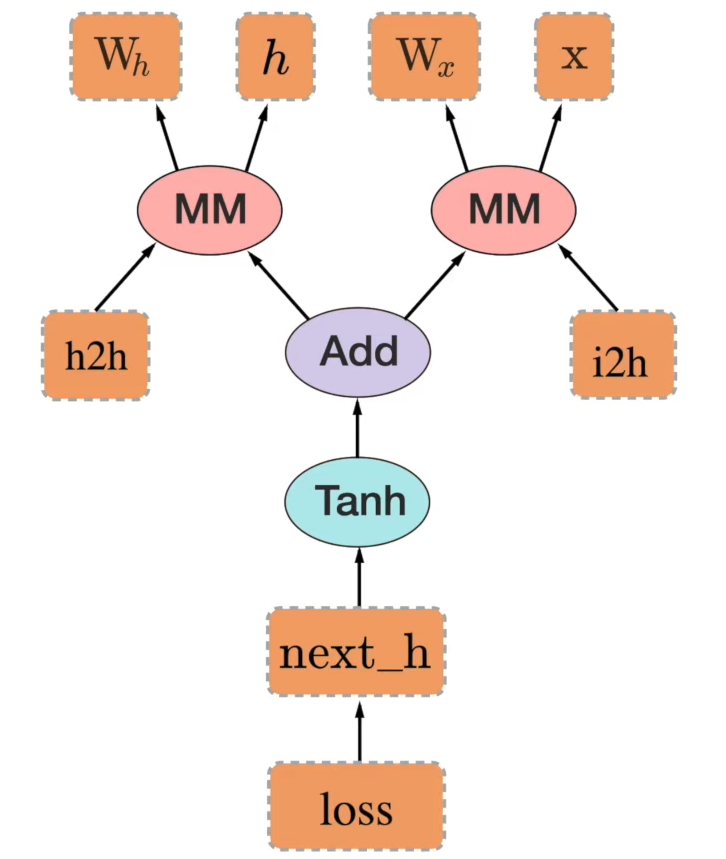

In [18]:
# autograd example on a simple RNN

# input data
x = torch.randn(1, 10)    # randn is an int random generator
# previous hidden state
prev_h = torch.randn(1, 20)
# hidden state weights
w_h = torch.randn(20, 20)
# x weights
w_x = torch.randn(20, 10)

# multiply the weights by their corresponding values
i2h = torch.mm(w_x, x.t())    # mm : matrix multiplication
h2h = torch.mm(w_h, prev_h.t())   # t() : transpose of a matrix

# compute the next hidden state
next_h = i2h + h2h
next_h = next_h.tanh()

# compute the loss
loss = next_h.sum()

# compute the derivates of that loss using the gradients of the parameters, and update the weights
# the computational history is tracked, and the gradients are calculated and weights updated using this simple method
loss = next_h.backward()

# A simple Pytorch Model

Let's try to build a LeNet neural network, following this architecture. 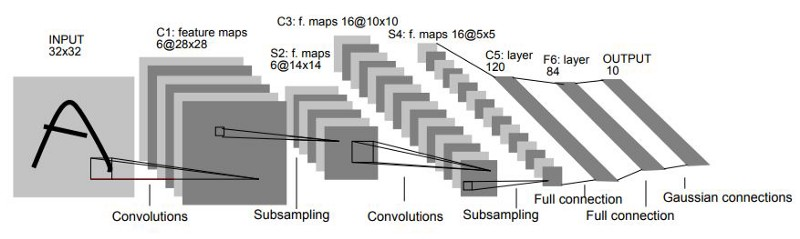

1. Input black and white image (1 channel)
2. Get 6 output channels, using a 3x3 convolution
3. Subsample the channels, using a 2x2 max pooling
4. Get 16 output channels, using 3x3 convolution
5. Subsample the channels, using a 2x2 max pooling
6. Flatten the channels and apply relu activation function
7. Add a fully connected layer with 120 nodes and relu activation function
8. Add a fully connected layer with 84 nodes and relu activation function
9. Add a fully connected layer with 10 nodes (number of classes) and linear activation function

In [26]:
class LeNet(nn.Module):   # inherit from nn.Module class
  
  def __init__(self):
    super(LeNet, self).__init__()
    # kernels
    self.conv1 = nn.Conv2d(1, 6, 3)   # 1 => number in_channels, 6 => number out_channels, 3 => kernel size (square)
    self.conv2 = nn.Conv2d(6, 16, 3)
    # linear functions that would be fed to relu
    self.ln1 = nn.Linear(16 * 5 * 5, 120)   # 16 * 5 * 5 => input shape, 120 => output shape
    self.ln2 = nn.Linear(120, 84)
    self.ln3 = nn.Linear(84, 10)

  def forward(self, x):
    """
    input: data (image)

    output: prediction

    The input will pass through the network layers and various functions to generate an output
    """
    x = F.max_pool2d(F.relu(self.conv1(x)), 2)   # 2 means shape (2, 2)
    x = F.max.pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))   # view : returns a new tensor with the same data as the self tensor but of a different shape (like making a copy then reshaping)
    x = F.relu(self.ln1(x))
    x = F.relu(self.ln2(x))
    x = self.ln3(x)
    return x
  
  def num_flat_features(self, x):
    """
      input: 3D image

      output: the total number of pixels
    """
    size = x.size()[1:]   # get the shape but ignore the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features